# DOWNLOAD DATASET

In [ ]:
!gdown 1SQe0PcWxwv0EkGn2SKaw9DWp_816RQGJ

Downloading...
From: https://drive.google.com/uc?id=1SQe0PcWxwv0EkGn2SKaw9DWp_816RQGJ
To: /content/dataset_6classtrash.zip
100% 42.7M/42.7M [00:01<00:00, 22.0MB/s]


# EKSTRAK FROM ZIP FILE

In [ ]:
!unzip dataset_6classtrash.zip -d data

Archive:  dataset_6classtrash.zip
   creating: dataset_6classtrash/dataset_6classtrash/cardboard/
  inflating: dataset_6classtrash/dataset_6classtrash/cardboard/cardboard1.jpg  
  inflating: dataset_6classtrash/dataset_6classtrash/cardboard/cardboard10.jpg  
  inflating: dataset_6classtrash/dataset_6classtrash/cardboard/cardboard100.jpg  
  inflating: dataset_6classtrash/dataset_6classtrash/cardboard/cardboard101.jpg  
  inflating: dataset_6classtrash/dataset_6classtrash/cardboard/cardboard102.jpg  
  inflating: dataset_6classtrash/dataset_6classtrash/cardboard/cardboard103.jpg  
  inflating: dataset_6classtrash/dataset_6classtrash/cardboard/cardboard104.jpg  
  inflating: dataset_6classtrash/dataset_6classtrash/cardboard/cardboard105.jpg  
  inflating: dataset_6classtrash/dataset_6classtrash/cardboard/cardboard106.jpg  
  inflating: dataset_6classtrash/dataset_6classtrash/cardboard/cardboard107.jpg  
  inflating: dataset_6classtrash/dataset_6classtrash/cardboard/cardboard108.jpg  
  i

# LABELING DATA

In [103]:
import tensorflow as tf
data = tf.keras.utils.image_dataset_from_directory('data/dataset_6classtrash')

Found 2527 files belonging to 6 classes.


In [104]:
# Get the class names
class_names = data.class_names

# Print the class names
print(class_names)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [105]:
data_iterator = data.as_numpy_iterator()

In [106]:
batch = data_iterator.next()

In [107]:
batch[0].shape

(32, 256, 256, 3)

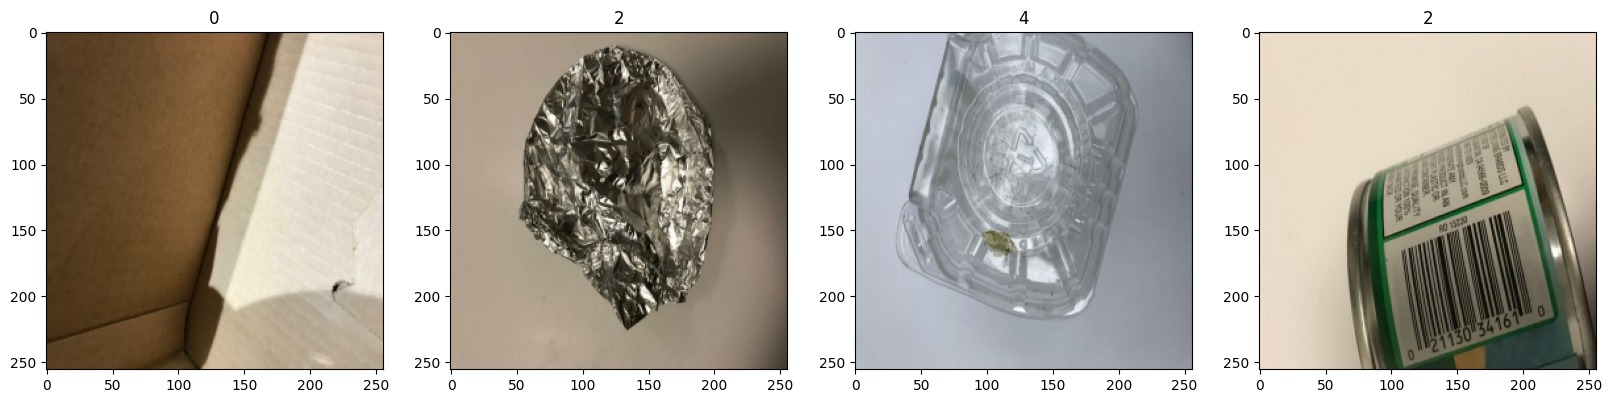

In [109]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(str(batch[1][idx]))

# SCALED DATA 0-1

In [31]:
data = data.map(lambda x,y: (x/255, y))

In [32]:
data.as_numpy_iterator().next()

(array([[[[0.59460783, 0.57892156, 0.56715685],
          [0.59607846, 0.5803922 , 0.5686275 ],
          [0.6       , 0.58431375, 0.57254905],
          ...,
          [0.6117647 , 0.6       , 0.5411765 ],
          [0.6117647 , 0.6       , 0.5411765 ],
          [0.6117647 , 0.6       , 0.5411765 ]],
 
         [[0.59607846, 0.5803922 , 0.5686275 ],
          [0.597549  , 0.58186275, 0.57009804],
          [0.6014706 , 0.5857843 , 0.5740196 ],
          ...,
          [0.6117647 , 0.6       , 0.5411765 ],
          [0.6117647 , 0.6       , 0.5411765 ],
          [0.6117647 , 0.6       , 0.5411765 ]],
 
         [[0.59705883, 0.58137256, 0.56960785],
          [0.6004902 , 0.58480394, 0.57303923],
          [0.6039216 , 0.5882353 , 0.5764706 ],
          ...,
          [0.6117647 , 0.6       , 0.5411765 ],
          [0.6117647 , 0.6       , 0.5411765 ],
          [0.6117647 , 0.6       , 0.5411765 ]],
 
         ...,
 
         [[0.69509804, 0.6911765 , 0.67156863],
          [0.69754

# SPLIT DATA TRAIN VAL TEST

In [33]:
len(data)

79

In [34]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [35]:
train_size+val_size+test_size

79

In [36]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [37]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# MODELLING WITH CNN

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [39]:
model = Sequential()

In [40]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [41]:
model.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

# CUSTOM CALLBACKS IF REACH ACCURACY 98

In [45]:
import tensorflow as tf
from tensorflow.keras.callbacks import Callback

class AccuracyStopCallback(Callback):
    def __init__(self, target_accuracy=0.98):
        super(AccuracyStopCallback, self).__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs=None):
        if logs['accuracy'] >= self.target_accuracy:
            self.model.stop_training = True

# Create an instance of the AccuracyStopCallback
accuracy_stop_callback = AccuracyStopCallback(target_accuracy=0.98)

# TRAINING

In [46]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[accuracy_stop_callback])

Epoch 1/15
55/55 [==============================] - 151s 3s/step - loss: 1.6332 - accuracy: 0.3148 - val_loss: 1.4486 - val_accuracy: 0.4141
Epoch 2/15
55/55 [==============================] - 143s 3s/step - loss: 1.3307 - accuracy: 0.4636 - val_loss: 1.2933 - val_accuracy: 0.5020
Epoch 3/15
55/55 [==============================] - 141s 3s/step - loss: 1.1806 - accuracy: 0.5409 - val_loss: 1.1882 - val_accuracy: 0.5449
Epoch 4/15
55/55 [==============================] - 138s 3s/step - loss: 0.9877 - accuracy: 0.6284 - val_loss: 1.0603 - val_accuracy: 0.6074
Epoch 5/15
55/55 [==============================] - 149s 3s/step - loss: 0.7585 - accuracy: 0.7250 - val_loss: 1.0825 - val_accuracy: 0.5879
Epoch 6/15
55/55 [==============================] - 146s 3s/step - loss: 0.6488 - accuracy: 0.7597 - val_loss: 1.1966 - val_accuracy: 0.6406
Epoch 7/15
55/55 [==============================] - 133s 2s/step - loss: 0.4318 - accuracy: 0.8517 - val_loss: 1.1024 - val_accuracy: 0.6914
Epoch 8/15
55

# PLOT ACCURACY AND LOSS

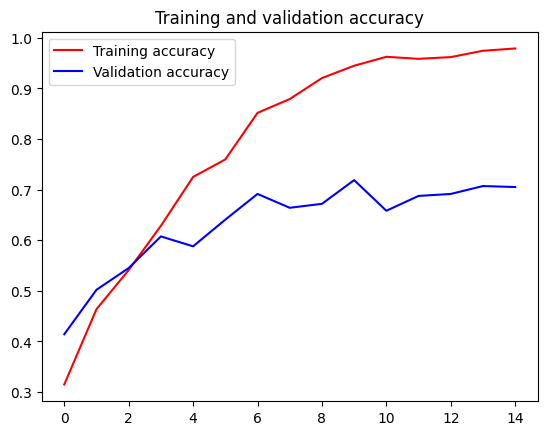

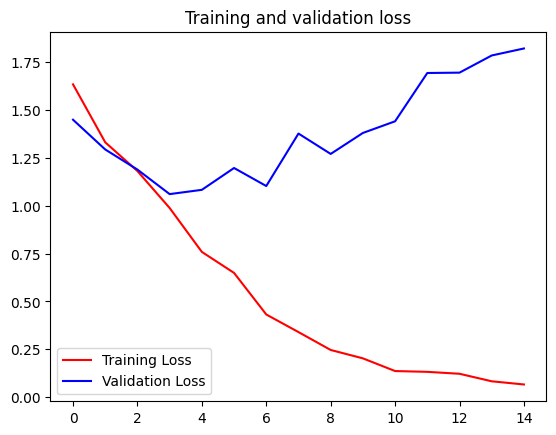

In [51]:
# Plot the chart for accuracy and loss on both training and validation
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# TEST THE MODEL WITH INPUT IMAGE

In [110]:
import cv2
import matplotlib 

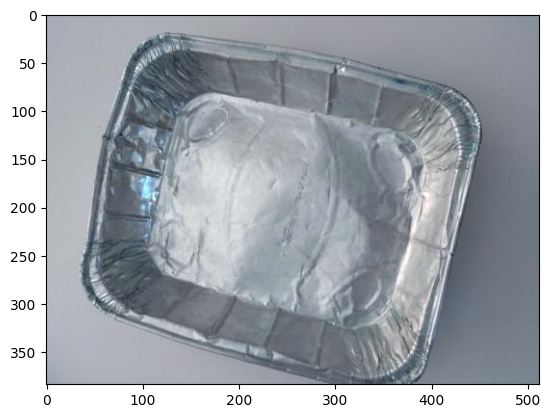

In [115]:
img = cv2.imread('data/dataset_6classtrash/metal/metal5.jpg')
plt.imshow(img)
plt.show()

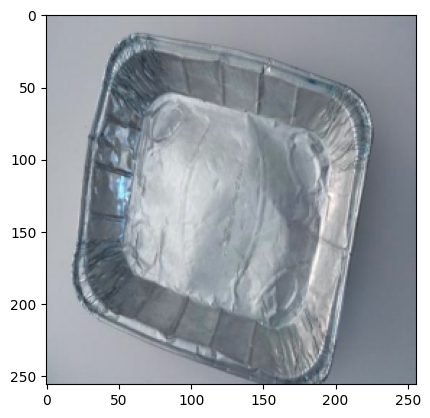

In [116]:
import numpy as np
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [117]:
import numpy as np

# Assuming `resize` is the image you want to predict
# Assuming `class_names` is the list of class names

# Preprocess the image
resized_image = resize / 255.0
input_image = np.expand_dims(resized_image, axis=0)

# Make predictions
yhat = model.predict(input_image)

# Get the predicted class index
predicted_class_index = np.argmax(yhat, axis=1)

# Get the predicted class name
predicted_class_name = class_names[predicted_class_index[0]]

# Get the class probabilities
class_probabilities = yhat[0]

# Print the predicted class and probabilities
print("Predicted class:", predicted_class_name)
print("Class probabilities:", class_probabilities)

1/1 [==============================] - 0s 39ms/step
Predicted class: metal
Class probabilities: [6.8173576e-05 1.3420058e-02 5.4797876e-01 4.3790436e-01 6.2859181e-04
 1.5785065e-09]


# SAVE THE MODEL TO H5 AND TFLITE

In [54]:
from tensorflow.keras.models import load_model
import os

In [55]:
model.save(os.path.join('saved_model','imageclassifier.h5'))

In [56]:
export_dir = 'saved_model'

tf.saved_model.save(model,export_dir=export_dir)

In [57]:
# Select mode of optimization
mode = "Speed" 

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [58]:
# EXERCISE: Use the TFLiteConverter SavedModel API to initialize the converter

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

# Set the optimzations
converter.optimizations = [optimization]

# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert();

In [118]:
import tensorflow as tf

# Assuming `tflite_model` is the generated TFLite model
saved_folder = 'saved_model'
tflite_model_path = f'{saved_folder}/model.tflite'

# Write the TFLite model to a file
tf.io.write_file(tflite_model_path, tflite_model)

print("TFLite model saved successfully.")


TFLite model saved successfully.
